<h1>ACTIVITY 2 : UK ACCIDENTS DATA ANALYTICS PROJECT</h1>
<hr>
<h3>Analyst : Mark John Well D. De Castro</h3>

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
import matplotlib as plt

<hr>
<h1>Importing the Dataset</h1>

In [5]:
data = pd.read_csv('datasets\\accident_data.csv')

<hr>
<h1>Checking Dataset Information</h1>

In [6]:
data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<hr>
<h1>Adjusting the Data Type of every column</h1>

In [8]:
data.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [9]:
data['Accident_Severity'] = data['Accident_Severity'].astype('category')
data['Light_Conditions'] = data['Light_Conditions'].astype('category')
data['District Area'] = data['District Area'].astype('category')
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].astype('category')
data['Road_Type'] = data['Road_Type'].astype('category')
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].astype('category')
data['Weather_Conditions'] = data['Weather_Conditions'].astype('category')
data['Vehicle_Type'] = data['Vehicle_Type'].astype('category')
data['Accident Date'] = data['Accident Date'].astype('str')
data['Accident Date'] = data['Accident Date'].str.replace('/','-')
data['Accident Date'] = pd.to_datetime(data['Accident Date'], dayfirst = True, errors = 'coerce')

<hr>
<h1>Checking for null values</h1>

In [10]:
data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<hr>
<h1>Filling up the Null Values</h1>

In [11]:
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mode()[0])
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mode()[0])
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].astype(str).fillna('unaccounted')
data['Road_Type'] = data['Road_Type'].astype(str).fillna('unaccounted')
data['Weather_Conditions'] = data['Weather_Conditions'].astype(str).fillna('unaccounted')
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].fillna(data['Urban_or_Rural_Area'].mode()[0])
data['Year'] = data['Accident Date'].dt.year
data['Month'] = data['Accident Date'].dt.month
data['Day'] = data['Accident Date'].dt.day
data['DayOfWeek'] = data['Accident Date'].dt.dayofweek

In [12]:
data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<hr>
<h1>Question 1</h1>
<h3>How Many Slight, Serious and Fatal Incident were observed?</h3>

In [13]:
data['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
According to the dataset, there were 660,679 total accidents from 2019 to 2022. There are three categories of accidents: Slight, Serious, and Fatal. Slight shows the highest count, totaling 563,801 or 85.33%, Serious is 88,217 or 13.35%, and lastly Fatal consists of 8,661 or 1.31% of the total accidents.
</h3>

<hr>
<h1>Question 2</h1>
<h3>How Many Accident happened each year?</h3>

In [14]:
data['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
During 2019, there were 182,115 accidents; in 2020, there were 170,591; in 2021, there were 163,554; and lastly, in 2022, there were 144,419.
</h3>

<hr>
<h1>Question 3</h1>
<h3>Which Year Shows the highest Total Accident?</h3>

In [15]:
accident_rate = data.groupby(['Year', 'Accident_Severity'])['Index'].count()

In [16]:
accident_rate.unstack()

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


<hr>
<h1>Insight</h1>
<h3>
The data shows that year 2019 has the highest accident count
</h3>

<hr>
<h1>Question 4</h1>
<h3>What type of Vehicle shows the highest accident count?</h3>

In [17]:
data['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
The data shows that the CAR has the highest accident count
</h3>

<hr>
<h1>Question 5</h1>
<h3>What District area has the Lowest Accident count?</h3>

In [18]:
data['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
The data shows that the Clackmannanshire has the lowest accident count
</h3>

<hr>
<h1>Question 6</h1>
<h3>What is the distribution of accidents in Clackmannanshire across different light conditions? </h3>

In [19]:
clacks = data[data['District Area'] == 'Clackmannanshire']

In [20]:
layt = clacks.groupby('Light_Conditions').size()
layt

Light_Conditions
Darkness - lighting unknown     0
Darkness - lights lit          22
Darkness - lights unlit         0
Darkness - no lighting          1
Daylight                       68
dtype: int64

<hr>
<h1>Insight</h1>
<h3>
Most accidents in Clackmannanshire occurred during daylight (about 75%), while around 24% happened at night with street lighting and only 1% in unlit darkness.
</h3>

<hr>
<h1>Question 7</h1>
<h3>During the Year 2019 what type of road condition has the most accident? </h3>

In [21]:
yer = data[data['Year'] == 2019]
rod = yer.groupby('Road_Surface_Conditions').size()
rod

Road_Surface_Conditions
Dry                     125348
Flood over 3cm. deep       312
Frost or ice              2569
Snow                       534
Wet or damp              53153
nan                        199
dtype: int64

<hr>
<h1>Insight</h1>
<h3>
In 2019, the majority of accidents occurred on dry road surfaces, indicating that most collisions happened under normal driving conditions rather than due to adverse weather.
</h3>

<hr>
<h1>Question 9</h1>
<h3>What Road Type has the most accident? </h3>

In [22]:
data['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
nan                     4520
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
Most accidents in the UK happened on single carriageways, followed by dual carriageways and roundabouts. This shows that roads with high daily use and traffic flow are where accidents are most common.
</h3>

<hr>
<h1>Question 10</h1>
<h3>In 2019,How many fatal accidents happened on a single carriageway? </h3>

In [23]:
yer = data[data['Year'] == 2019]
sev = yer.groupby('Accident_Severity').size()
sev

Accident_Severity
Fatal        2714
Serious     24322
Slight     155079
dtype: int64

<hr>
<h1>Insight</h1>
<h3>
In 2019, there were 2,714 fatal accidents on single carriageways in the UK, showing that this road type carried the highest risk of deadly crashes.
</h3>

<hr>
<h1>Question 11</h1>
<h3>How many casualties are most common per accident? </h3>

In [24]:
data['Number_of_Casualties'].mode()[0]

np.int64(1)

<hr>
<h1>Insight</h1>
<h3>
Most accidents involve a single casualty, suggesting many are smaller-scale incidents.
</h3>

<hr>
<h1>Question 12</h1>
<h3>Are accidents more common in urban or rural areas?</h3>

In [25]:
data['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
Most accidents occur in urban areas, likely due to higher population and vehicle density.
</h3>

<hr>
<h1>Question 13</h1>
<h3>What types of roads are present in each district?</h3>

In [26]:
# road = data.groupby(data['District Area'])['Road_Type'].value_counts()
# pd.set_option("display.max_rows", None)
# road.unstack()

<hr>
<h1>Insight</h1>
<h3>
Most accidents occur in urban areas, likely due to higher population and vehicle density.
</h3>

<hr>
<h1>Question 14</h1>
<h3>What is the average accident per year?</h3>

In [27]:
year1 = data[data['Year'] == 2019]['Month'].value_counts()
year1.mean()

np.float64(15176.25)

In [28]:
year2 = data[data['Year'] == 2020]['Month'].value_counts()
year2.mean()

np.float64(14215.916666666666)

In [29]:
year3 = data[data['Year'] == 2021]['Month'].value_counts()
year3.mean()

np.float64(13629.5)

In [30]:
year4 = data[data['Year'] == 2022]['Month'].value_counts()
year4.mean()

np.float64(12034.916666666666)

<hr>
<h1>Insight</h1>
<h3>
There is a consistent annual decrease in the average number of accidents, suggesting possible improvements in safety measures or because of pandemic 
</h3>

<hr>
<h1>Question 15</h1>
<h3>What District Area has the highest Accident?</h3>

In [31]:
data['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
The data shows that the Birmingham has the highest accident count with total of 13491 accidents throughout the year
</h3>

<hr>
<h1>Question 16</h1>
<h3>In year 2019, What Month has the highest Accident Count?</h3>

In [32]:
hay_month = data[data['Year'] == 2019].value_counts()
mant = hay_month.groupby('Month').size()
mant

Month
1     15355
2     13253
3     15049
4     14125
5     15833
6     15527
7     15862
8     15043
9     15271
10    15526
11    16559
12    14708
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
The data shows that November has the highest count of accident with the total of 16 559.
</h3>

<hr>
<h1>Question 17</h1>
<h3>How many Accidents that have 2 casualties?</h3>

In [33]:
add = data[data['Number_of_Casualties']== 2].shape[0]
add

107971

<hr>
<h1>Insight</h1>
<h3>
The data shows that there are 107971 accidents with 2 casualties showing that there are more casualties in UK road accidents.
</h3>

<hr>
<h1>Question 18</h1>
<h3>What is the highest number of vehicle count in a Accident</h3>

In [34]:
data['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2     391995
1     200787
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
14         9
12         7
13         6
16         4
28         1
15         1
32         1
19         1
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
the data shows that there is accident where 19 vehicles is included
</h3>

<hr>
<h1>Question 19</h1>
<h3>What type of car has the lowest counts of accident?</h3>

In [35]:
data['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
The data shows that the Ridden horse has the lowest accident count with the total of 4 accidents
</h3>

<hr>
<h1>Question 19</h1>
<h3>Which weather condition has the fewest accidents?</h3>

In [36]:
data['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
nan                       14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
The data shows that the fewest number accidents happened during the Snowing + high winds weather condition
</h3>

<hr>
<h1>Question 20</h1>
<h3>How many accidents happened on roundabouts?</h3>

In [37]:
data[data['Road_Type']== 'Roundabout'].shape[0]

43992

<hr>
<h1>Insight</h1>
<h3>
Although roundabouts reduce severe crashes, accidents still occur due to misjudgments and failure to yield.
</h3>

<hr>
<h1>Question 21</h1>
<h3>Which weather condition has the highest count of accident?</h3>

In [38]:
data['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
nan                       14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<hr>
<h1>Insight</h1>
<h3>
The data shows that the Weather condition that has the highest count of acciden is a Fine no high winds weather condition. This insight shows that the accidents most likely happened beacuse of reckless driving.
</h3>

<hr>
<h1>Question 22</h1>
<h3>How many slight accident during a Fine no high winds weather condition?</h3>

In [41]:
counts = data[(data['Accident_Severity'] == 'Slight')]['Weather_Conditions'].value_counts()
print(counts['Fine no high winds'])


441739


<hr>
<h1>Insight</h1>
<h3>
There are slight 441 739 accident that happened on a Fine and no high winds weather condition 
</h3>

<hr>
<h1>Question 23</h1>
<h3>Comparison of accident on Urban and Rural Areas</h3>

In [ ]:
urban_rural_counts = data['Urban_or_Rural_Area'].value_counts()
urban_rural_counts

<hr>
<h1>Insight</h1>
<h3>
Urban areas account for 63.85% of all accidents (421 678 incidents), while rural areas make up 36.17% (238 990 incidents), with less than 0.002% (11 incidents) unallocated, highlighting that urban areas experience significantly more accidents than rural regions. 
</h3>

In [ ]:
fatal_accidents = data[data['Accident_Severity'] == 'Fatal']
fatal_dry_accidents = fatal_accidents[fatal_accidents['Road_Surface_Conditions'] == 'Dry']
fatal_dry_accidents.shape[0]


<hr>
<h1>Question 25</h1>
<h3>How does the number of fatal accidents vary by month?</h3>

In [ ]:
fatal_accidents = data[data['Accident_Severity'] == 'Fatal']
fatal_monthly_accidents = fatal_accidents['Month'].value_counts().sort_index()

print("Fatal Accidents by Month:")
print(fatal_monthly_accidents)

<hr>
<h1>Insight</h1>
<h3>
Fatal accidents are highest from August to December, peaking in August (801) and October (798), and lowest in February (617). This suggests a seasonal trend, with more fatalities in the second half of the year, possibly due to increased travel or changing weather conditions.
</h3>

In [53]:
# distrik = data['District Area'].value_counts()
# pd.set_option("display.max_rows", None)
# distrik

<hr>
<h1>DATA VISUALIZATION</h1>

<hr>
<h1>BARPLOT OF SIX RANDOM CITIES IN UK</h1>

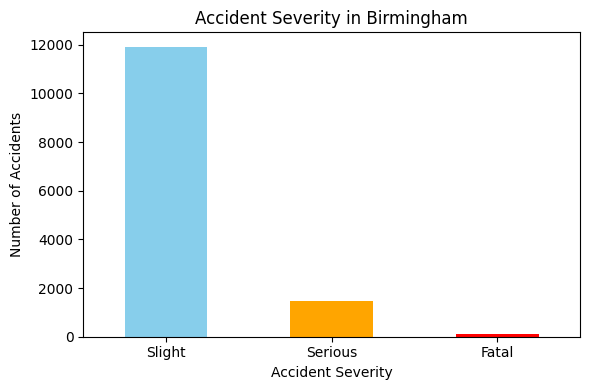

In [72]:
import pandas as pd
import matplotlib.pyplot as plt


birmingham_data = data[data['District Area'] == "Birmingham"]
severity_counts = birmingham_data['Accident_Severity'].value_counts()
severity_counts.plot(kind="bar", color=["skyblue", "orange", "red"], figsize=(6,4))

plt.title("Accident Severity in Birmingham")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<hr>
<h1>Insight #26</h1>
<h3>
In Birmingham, most of the accidents are slight. Serious accidents are fewer, and fatal accidents are the least. This shows that slight accidents happen the most in the city.
</h3>

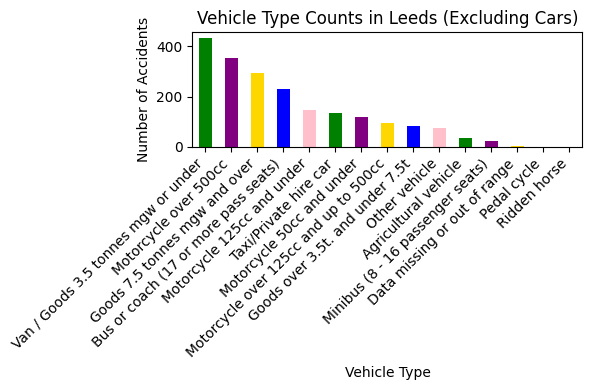

In [68]:
leeds_data = data[data['District Area'] == "Leeds"]
vehicle_counts = leeds_data['Vehicle_Type'].value_counts()


vehicle_counts = vehicle_counts[vehicle_counts.index != "Car"]

vehicle_counts.plot(kind="bar", color=["green", "purple", "gold", "blue", "pink"], figsize=(6,4))

plt.title("Vehicle Type Counts in Leeds (Excluding Cars)")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<hr>
<h1>Insight #27</h1>
<h3>
The bar chart displays the number of accidents in Leeds by vehicle type, with cars excluded from the analysis. Since cars represent the largest share of accidents, they were removed to highlight the involvement of other vehicle types. This exclusion shows the number of other vehicle type showing the VAN has the second highest count of accident

</h3>

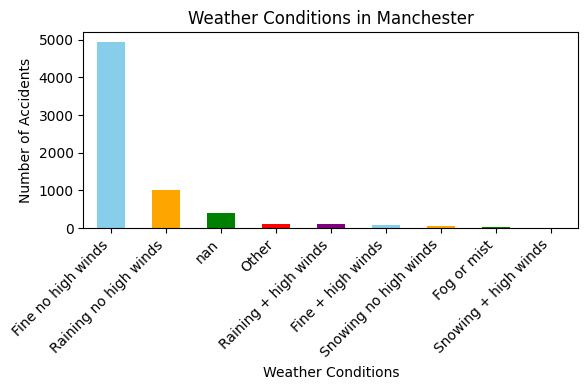

In [71]:
manchester_data = data[data['District Area'] == "Manchester"]
weather_counts = manchester_data['Weather_Conditions'].value_counts()

weather_counts.plot(kind="bar", color=["skyblue", "orange", "green", "red", "purple"], figsize=(6,4))

plt.title("Weather Conditions in Manchester")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<hr>
<h1>Insight #28</h1>
<h3>
In Manchester, most accidents happen when the weather is fine with no high winds. There are fewer accidents in rainy or snowy conditions. This means clear weather still has the most accidents.
</h3>

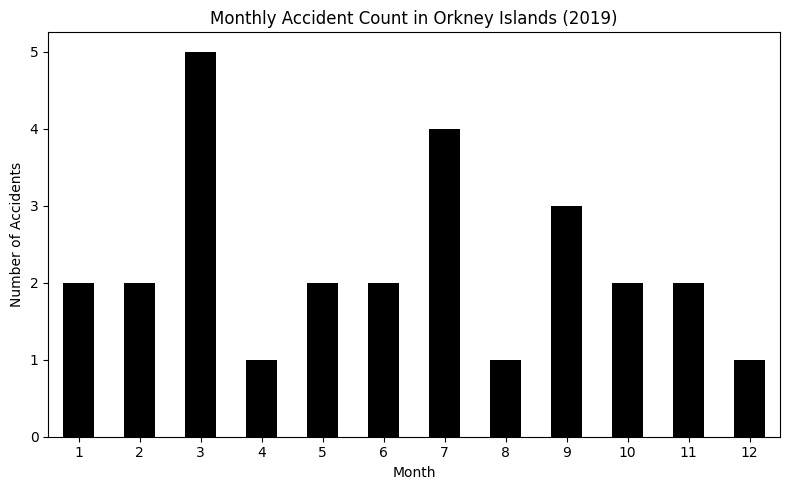

In [70]:
orkney_data = data[(data['District Area'] == "Orkney Islands") & (data['Year'] == 2019)]
monthly_counts = orkney_data['Month'].value_counts().sort_index()
monthly_counts.plot(kind="bar", color="Black", figsize=(8,5))

plt.title("Monthly Accident Count in Orkney Islands (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<hr>
<h1>Insight #29</h1>
<h3>
The bar chart shows the number of accidents in Orkney Islands for every month in 2019. Some months have more accidents while other months have very few. This means accidents are not the same each month, they go up and down.
</h3>

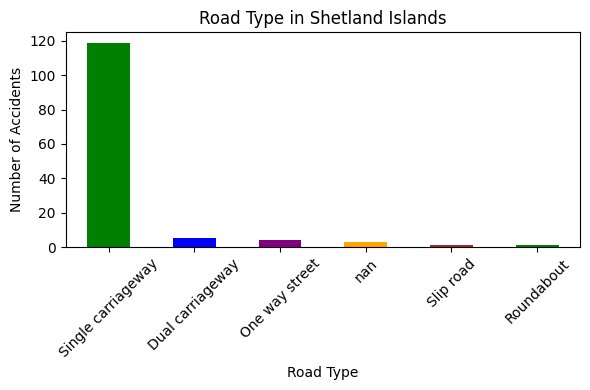

In [69]:
birmingham_data = data[data['District Area'] == "Shetland Islands"]
roadtype_counts = birmingham_data['Road_Type'].value_counts()
roadtype_counts.plot(kind="bar", color=["green", "blue", "purple", "orange", "brown"], figsize=(6,4))

plt.title("Road Type in Shetland Islands")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<hr>
<h1>Insight #30</h1>
<h3>
The bar chart shows the number of accidents in Shetland Islands based on road type. From the graph, we can see that most accidents happened on one main road type while the others had fewer cases. This means that the kind of road can affect how many accidents happen, and busy or common roads are more likely to have accidents.

</h3>

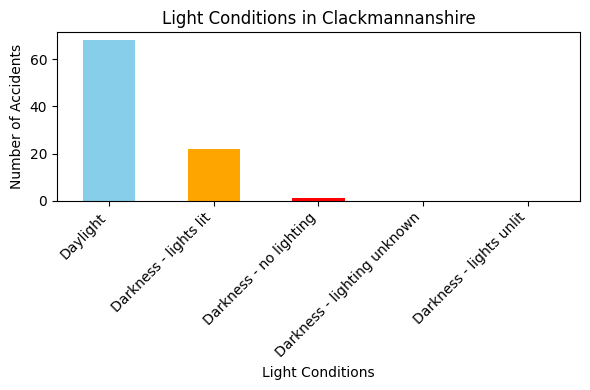

In [60]:
birmingham_data = data[data['District Area'] == "Clackmannanshire"]
light_counts = birmingham_data['Light_Conditions'].value_counts()

light_counts.plot(kind="bar", color=["skyblue", "orange", "red"], figsize=(6,4))

plt.title("Light Conditions in Clackmannanshire")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<hr>
<h1>Insight #31</h1>
<h3>
Most of the accidents in Clackmannanshire happened during daylight. Fewer accidents happened when it was dark, and the least accidents happened when it was dark without lights. This shows that light conditions affect how often accidents occur.
</h3>